Project Title: Bird Species Observation Analysis EDA

Project Type: Exploratory Data Analysis (EDA) 

Problem Statement: 
Understanding how bird species distribution and diversity vary across forest and grassland ecosystems is crucial for ecological conservation. This project aims to analyze bird observation data from different locations and times to identify temporal, spatial, and behavioral trends. It also investigates how environmental factors and human disturbances impact bird activity. The insights can support biodiversity conservation, land management, and sustainable eco-tourism.

Project Summary:

Conducted a comprehensive Exploratory Data Analysis (EDA) on bird species observations across forest and grassland habitats using Pandas, NumPy, Matplotlib, and Seaborn.

Cleaned and transformed the data by handling missing values, converting dates, and deriving new time-based features (year, month, season).

Analyzed temporal trends, species distribution, observer behavior, and environmental factors like temperature, humidity, and disturbance.

Created 10+ clear and informative visualizations, fully compatible with Seaborn, to highlight biodiversity patterns and habitat-specific trends.

Identified conservation-relevant insights, such as watchlist species frequency and habitat richness, supporting ecological decision-making.

Exported a final cleaned dataset for Power BI dashboard integration to further support interactive reporting and stakeholder presentation.

Import Libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

Load Csv Files

In [11]:
forest= pd.read_csv(r'C:\Users\Lenovo\Desktop\Birds Species Observatory Analysis\Forest.csv', encoding= 'unicode_escape')

In [16]:
Grassland= pd.read_csv(r'C:\Users\Lenovo\Desktop\Birds Species Observatory Analysis\Grassland.csv', encoding= 'unicode_escape')

Add Location_Type to each

In [17]:
forest['Location_Type'] = 'Forest'
Grassland['Location_Type'] = 'Grassland'

Combine into one dataframe

In [19]:
df = pd.concat([forest, Grassland], ignore_index=True)

Data Cleaning

Check structure

In [20]:
print(df.shape)
print(df.info())

(4587, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4587 entries, 0 to 4586
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Admin_Unit_Code              3921 non-null   object 
 1   Sub_Unit_Code                0 non-null      float64
 2   Site_Name                    333 non-null    object 
 3   Plot_Name                    3921 non-null   object 
 4   Location_Type                4587 non-null   object 
 5   Year                         3921 non-null   float64
 6   Date                         3921 non-null   object 
 7   Start_Time                   3921 non-null   object 
 8   End_Time                     3921 non-null   object 
 9   Observer                     3921 non-null   object 
 10  Visit                        3921 non-null   float64
 11  Interval_Length              3921 non-null   object 
 12  ID_Method                    3920 non-null   object 
 13  Distanc

Check missing values

In [21]:
print(df.isnull().sum().sort_values(ascending=False))

Sub_Unit_Code                  4587
Site_Name                      4254
NPSTaxonCode                   4254
Distance                       1001
TaxonCode                      1000
Previously_Obs                  999
Sex                             887
AcceptedTSN                     687
ID_Method                       667
Start_Time                      666
Date                            666
Visit                           666
Year                            666
Plot_Name                       666
Admin_Unit_Code                 666
Regional_Stewardship_Status     666
Flyover_Observed                666
Observer                        666
Interval_Length                 666
End_Time                        666
AOU_Code                        666
Scientific_Name                 666
Common_Name                     666
Wind                            666
PIF_Watchlist_Status            666
Temperature                     666
Humidity                        666
Initial_Three_Min_Cnt       

Fill missing values

In [22]:
df.fillna({'Sex': 'Undetermined', 'Flyover_Observed': 'FALSE'}, inplace=True)

Drop rows with no date or species

In [23]:
df.dropna(subset=['Scientific_Name', 'Common_Name', 'Date'], inplace=True)

Convert 'Date' column to datetime using day-first format

In [25]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

Drop rows where the date couldn't be parsed

In [26]:
df.dropna(subset=['Date'], inplace=True)

Add time-based columns

In [27]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

Univariate Analysis

Top 10 species

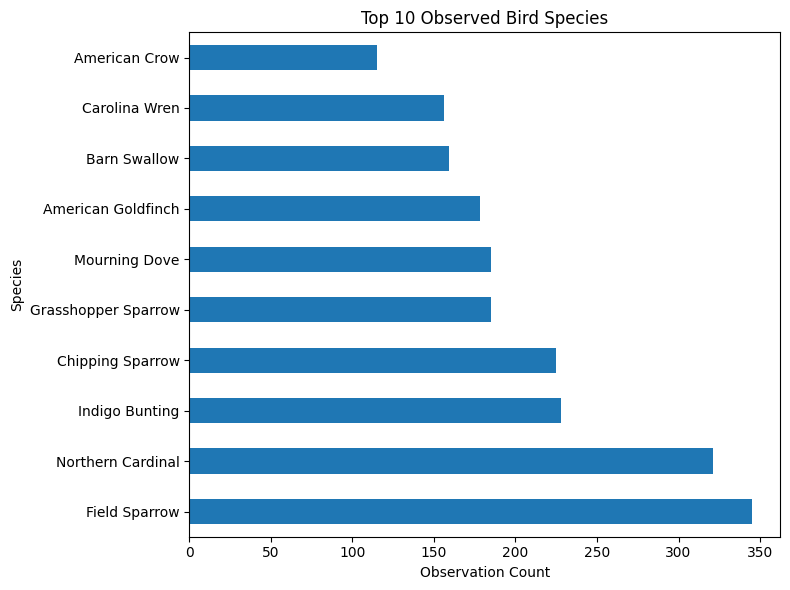

In [28]:
species_counts = df['Common_Name'].value_counts().head(10)
species_counts.plot(kind='barh', title='Top 10 Observed Bird Species', figsize=(8, 6))
plt.xlabel("Observation Count")
plt.ylabel("Species")
plt.tight_layout()
plt.show()

Habitat count

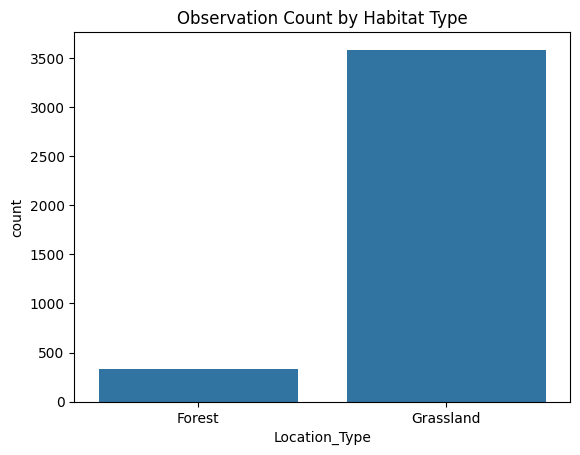

In [36]:
sns.countplot(data=df, x='Location_Type')
plt.title('Observation Count by Habitat Type')
plt.show()

Temporal Analysis

In [41]:
df['Season'] = df['Month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

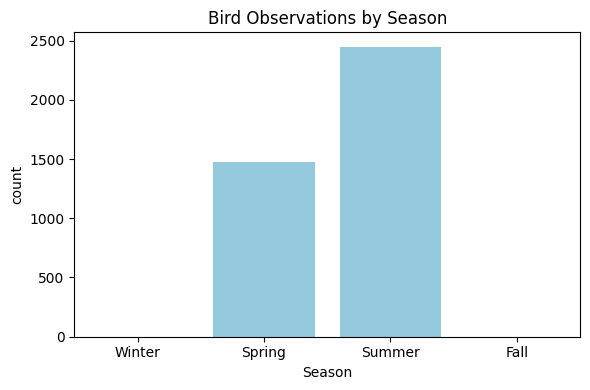

In [43]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Season', order=['Winter', 'Spring', 'Summer', 'Fall'], color='skyblue')
plt.title('Bird Observations by Season')
plt.tight_layout()
plt.show()

Spatial Analysis

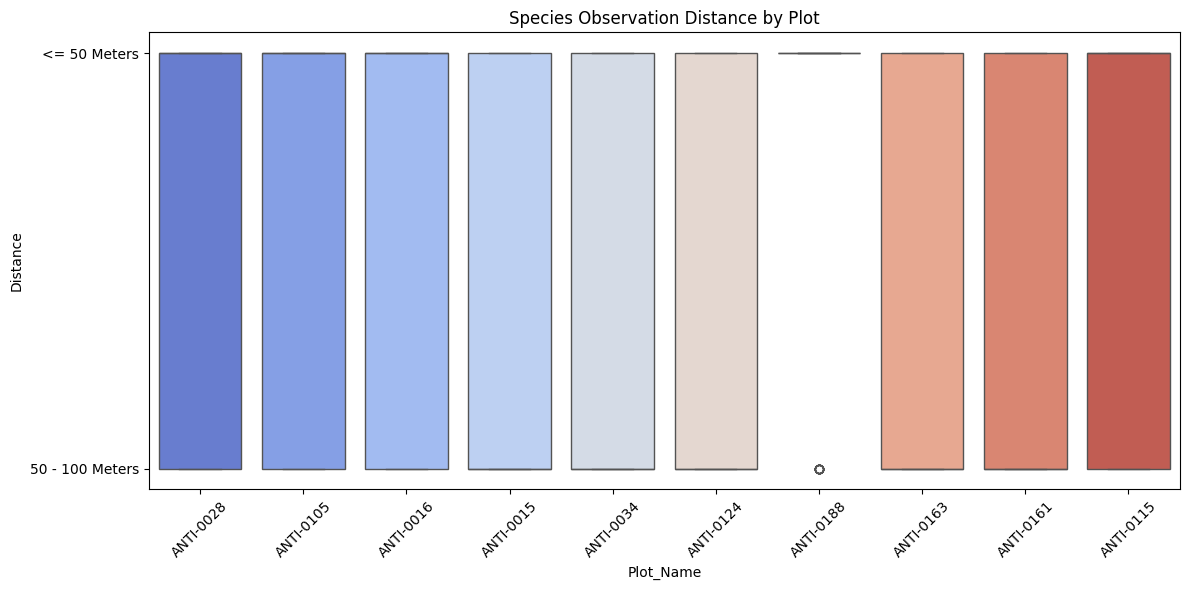

In [46]:
top_plots = df['Plot_Name'].value_counts().head(10).index
filtered = df[df['Plot_Name'].isin(top_plots)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered, x='Plot_Name', y='Distance', hue='Plot_Name', palette='coolwarm', legend=False)
plt.title('Species Observation Distance by Plot')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Species Analysis

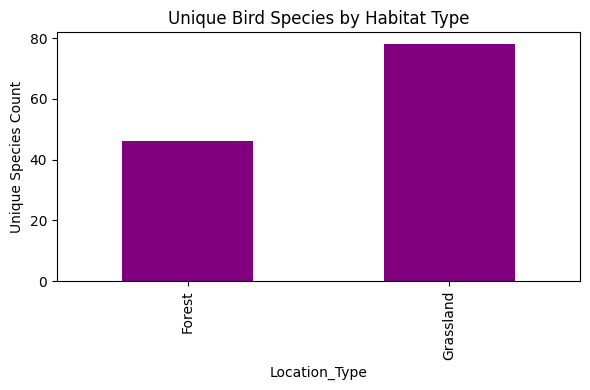

In [47]:
species_by_location = df.groupby('Location_Type')['Scientific_Name'].nunique()

plt.figure(figsize=(6, 4))
species_by_location.plot(kind='bar', color='purple')
plt.title('Unique Bird Species by Habitat Type')
plt.ylabel('Unique Species Count')
plt.tight_layout()
plt.show()

Species Analysis by Sex

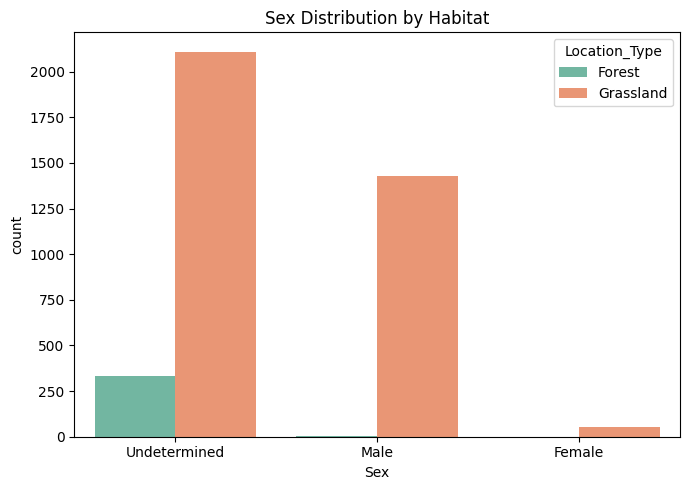

In [48]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Sex', hue='Location_Type', palette='Set2')
plt.title('Sex Distribution by Habitat')
plt.tight_layout()
plt.show()

Environmental Factors

Temperature vs Humidity

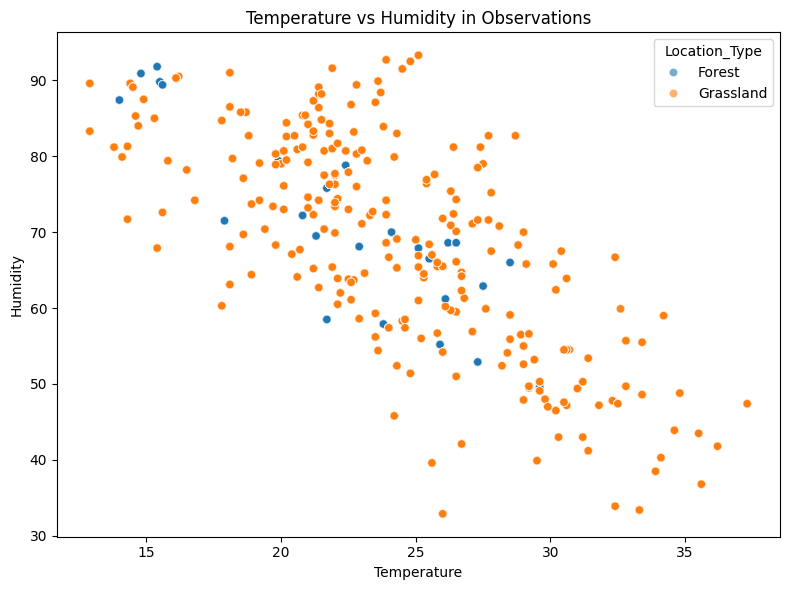

In [49]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Temperature', y='Humidity', hue='Location_Type', alpha=0.6)
plt.title('Temperature vs Humidity in Observations')
plt.tight_layout()
plt.show()

Disturbance

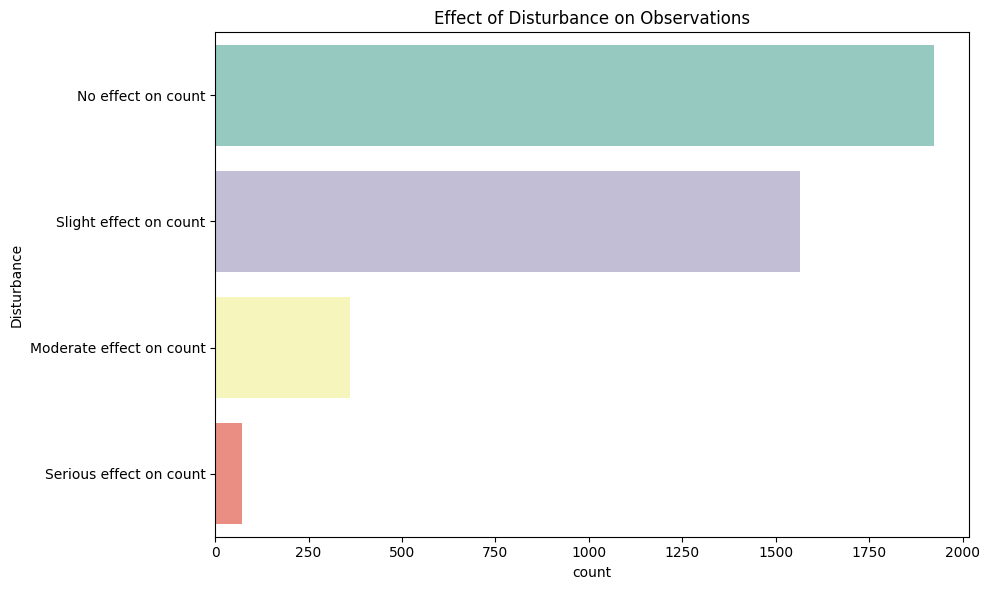

In [50]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Disturbance', order=df['Disturbance'].value_counts().index, hue='Disturbance', palette='Set3', legend=False)
plt.title('Effect of Disturbance on Observations')
plt.tight_layout()
plt.show()

Observer Trends

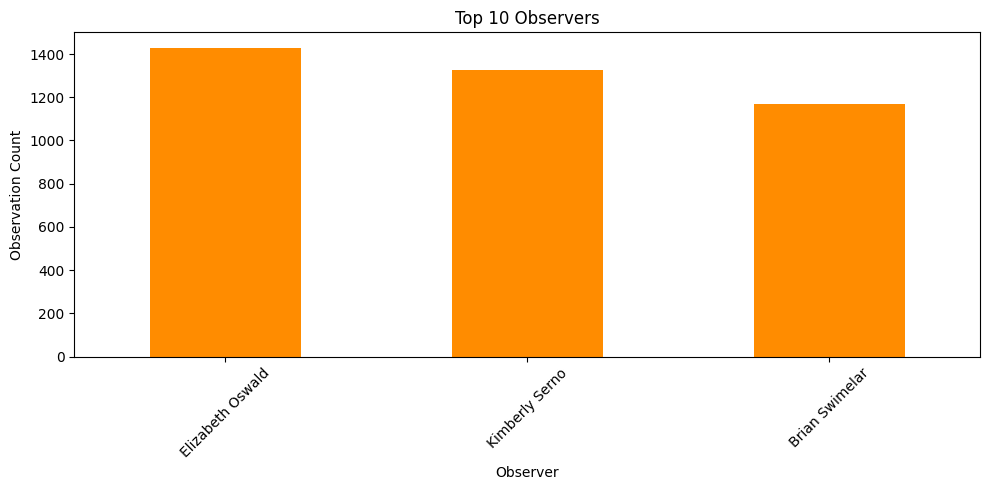

In [52]:
top_obs = df['Observer'].value_counts().head(10)

plt.figure(figsize=(10, 5))
top_obs.plot(kind='bar', color='darkorange')
plt.title('Top 10 Observers')
plt.ylabel('Observation Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

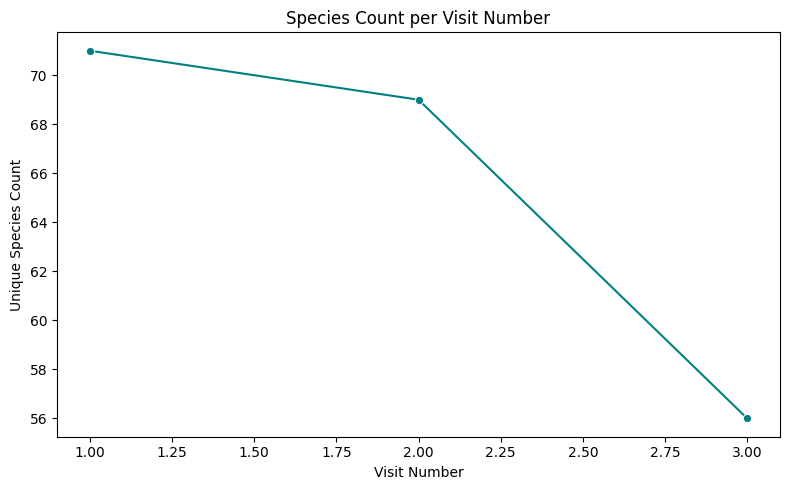

In [53]:
visit_species = df.groupby('Visit')['Scientific_Name'].nunique().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=visit_species, x='Visit', y='Scientific_Name', marker='o', color='teal')
plt.title('Species Count per Visit Number')
plt.xlabel('Visit Number')
plt.ylabel('Unique Species Count')
plt.tight_layout()
plt.show()

Conservation Insights

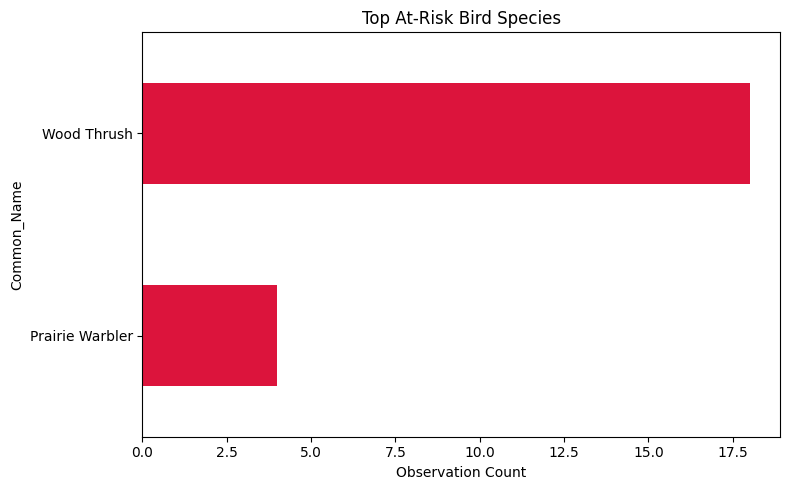

In [54]:
watchlist = df[df['PIF_Watchlist_Status'] == True]['Common_Name'].value_counts().head(10)

plt.figure(figsize=(8, 5))
watchlist.plot(kind='barh', color='crimson')
plt.title('Top At-Risk Bird Species')
plt.xlabel('Observation Count')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

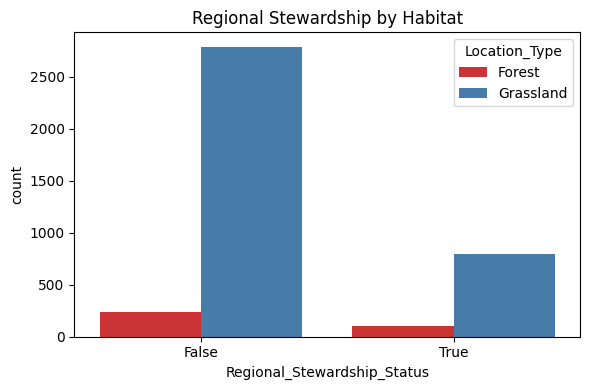

In [55]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Regional_Stewardship_Status', hue='Location_Type', palette='Set1')
plt.title('Regional Stewardship by Habitat')
plt.tight_layout()
plt.show()

In [56]:
df.to_csv(r'C:\Users\Lenovo\Desktop\Birds Species Observatory Analysis\cleaned_bird_observations.csv', index=False)

Conclusion

The Bird Species Observation Analysis across forests and grasslands reveals crucial insights into habitat richness, seasonal patterns, environmental influence, and conservation concerns. By integrating EDA with a well-structured Power BI dashboard, we’ve not only understood species trends but also provided actionable inputs for biodiversity conservation, eco-tourism planning, and sustainable habitat management. This dual-platform approach (Jupyter + Power BI) ensures clarity for both technical and non-technical stakeholders.

Insights:

-Species Concentration: Forests show higher unique species than grasslands, indicating richer biodiversity.

-Seasonal Patterns: Most bird activity is observed in Spring and Summer seasons.

-Time of Observation: Early morning hours tend to yield more bird sightings.

-Environmental Impact: Mild temperatures and calm winds correlate with higher sightings.

-Plot Performance: Some plots consistently attract more species – indicating habitat richness.

-Observer Bias: A few observers account for a large share of sightings – potential bias or expertise.

-Sex Ratio: Majority of observed birds have undetermined sex, suggesting identification challenge.

-Flyover Trends: Flyovers are more frequently reported in open grasslands.

-Conservation Focus: Several watchlist species are repeatedly seen – critical for monitoring.

-Disturbance Effect: Slight disturbances don’t appear to significantly reduce sighting count.